# 케라스 MNIST

## 0. 사용할 패키지 불러오기

In [7]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

## 1. 데이터셋 생성하기

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 2. 모델 구성하기

In [11]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## 3. 모델 학습과정 설정하기

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 4. 모델 학습시키기

In [13]:
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.6603 - accuracy: 0.8338
Epoch 2/5
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3389 - accuracy: 0.9072
Epoch 3/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2903 - accuracy: 0.9187
Epoch 4/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2609 - accuracy: 0.9268
Epoch 5/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2388 - accuracy: 0.9327


## 5. 학습과정 살펴보기

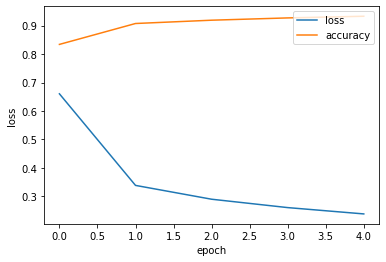

In [16]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [20]:
print('loss : ',hist.history['loss'])
print('acc  : ',hist.history['accuracy'])

loss :  [0.6603414728005728, 0.33887684350411096, 0.29034598187208177, 0.2609464599788189, 0.23876884234348933]
acc  :  [0.8338, 0.90716666, 0.91875, 0.9267833, 0.93265]


## 6. 모델 평가하기

In [21]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print(loss_and_metrics)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.2253 - accuracy: 0.9372
## evaluation loss and_metrics ##
[0.2253451247930527, 0.9372]


## 7. 모델 사용하기

In [25]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print(y_test[0:1])
print(yhat)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[9.3641036e-05 1.3871427e-07 3.1959312e-04 2.3084250e-03 2.0507925e-06
  1.6753876e-04 1.5308354e-08 9.9601787e-01 4.5056040e-05 1.0457512e-03]]
